
# Escuela Politécnica Nacional

## Informe de Proyecto II Bimestre Métodos Numéricos

## Integrantes:
1. Andres Ayala
2. Ian Oñate.
3. Pablo Pacheco.
4. Jhonn Saeteros.

# Marco Teórico

La energía solar que nuestro país recibe es aprovechada principalmente por los paneles solares, que son la base fundamental de nuestro proyecto y la inspiración del mismo, ya que se va a emplear una técnica para optimizar la captación de energía solar mediante el ajuste continuo de la orientación de un panel fotovoltaico en función de la posición aparente del sol.  

En sistemas de seguimiento de dos grados de libertad, el panel puede rotar sobre dos ejes: el **azimutal** (eje horizontal) y el de **elevación** (eje vertical). Esto nos permite mantener una orientación perpendicular a los rayos solares durante todo el día.  

Principalmente consideramos que:  

La posición solar respecto a un punto de la superficie terrestre se describe mediante dos ángulos principales que mencionamos anteriormente. Profundizando, el ángulo de **elevación** es el ángulo entre el horizonte y el sol, mientras que el **azimut** es el ángulo horizontal medido desde el norte geográfico hasta la proyección del sol en el plano horizontal.  

Estos parámetros dependen de:  
* Latitud y longitud de nuestro lugar.  
* Fecha y hora que se determine.  
* Ecuación del tiempo y declinación solar, que describen la variación anual de la posición del sol debido a la inclinación del eje terrestre y la excentricidad de la órbita.  


### Cálculo de la posición solar

Actualmente existen diversos modelos matemáticos para determinar la posición de nuestro astro, como el **Solar Position Algorithm (SPA)** del NREL o las fórmulas astronómicas de Meeus. En este proyecto se emplea la librería **PySolar**, que implementa ecuaciones astronómicas precisas para determinar directamente la elevación y el azimut a partir de coordenadas geográficas, fecha y hora.


### Cálculo

El cálculo básico se puede expresar de la siguiente manera:  

$\theta = \text{get\_altitude}(\varphi, \lambda, t)$  

$\alpha = \text{get\_azimuth}(\varphi, \lambda, t)$  


### Orientación del panel solar

Para orientar el panel correctamente es necesario transformar la posición solar en ángulos mecánicos que controlen los actuadores. Para esto entra en juego:  

- **Pitch** $90^\circ - \theta$: ángulo de elevación del panel solar.  
- **Roll** $\alpha$: ángulo de azimut del panel solar.  

Pitch ajusta la inclinación vertical del panel, mientras que Roll controla la rotación horizontal en función del azimut solar.


### Representación en 3D

La simulación gráfica del sistema se realiza mediante:  
1. Vectores unitarios que indican la dirección del sol:  
   $s = [\cos(\theta) \cdot \sin(\alpha),\ \cos(\theta) \cdot \cos(\alpha),\ \sin(\theta)]$  
2. Transformaciones geométricas para obtener los vértices del panel a partir del vector normal.  
3. Visualización en **Matplotlib 3D**, mostrando tanto la trayectoria solar como la orientación dinámica del panel.


Es importante el uso de los seguidores solares de dos ejes, pues permite maximizar la irradiancia recibida, aumentando la eficiencia energética respecto a sistemas fijos. En condiciones óptimas, este tipo de sistema puede incrementar la captación de energía entre un **25% y un 40%** anual, dependiendo de la latitud y las condiciones meteorológicas.



## Metodología

El sistema desarrollado es una aplicación en **Python** que simula el movimiento de un panel solar de dos grados de libertad (elevación y azimut) en función de la posición aparente del sol para una ubicación específica.  
El objetivo es calcular los ángulos de orientación (Pitch y Roll) del panel en distintos momentos del día y representarlos visualmente en 3D junto con la trayectoria solar.  

Para lograrlo se implementa:
- **Entrada de datos**: el usuario selecciona fecha, hora de inicio, duración y intervalo de cálculo.
- **Cálculo astronómico**: mediante la librería **PySolar** se obtienen la elevación y el azimut solar.
- **Conversión a ángulos mecánicos**: se transforman estos valores en Pitch y Roll.
- **Visualización 3D**: usando `matplotlib` y `mpl_toolkits.mplot3d` para mostrar la trayectoria del sol y la orientación dinámica del panel.
- **Interfaz gráfica**: desarrollada en `Tkinter` con controles para iniciar, pausar, reiniciar y navegar por la animación.


# Desarollo Matemático

Para la realización de los cálculos de la posición solar se hizo lo siguiente.
**la Elevación** y el **azimut** se calculan usando:
**a) Cálculo de la posición solar**  
La **elevación solar** \\( \theta \\) y el **azimut** \\( \alpha \\) se calculan mediante:

$\theta = \text{get\_altitude}(\varphi, \lambda, t)$

$\alpha = \text{get\_azimuth}(\varphi, \lambda, t)$

donde:
- $\varphi$ = latitud geográfica  
- $\lambda$ = longitud geográfica  
- $t$ = instante de tiempo local  

**b) Conversión a ángulos de control del panel**  
Se definen los ángulos mecánicos del seguidor:

$\text{Pitch} = 90^\circ - \theta$

$\text{Roll} = \alpha$

**c) Vector unitario solar**  
La dirección del sol en coordenadas 3D se calcula como:

$\vec{s} =
\begin{bmatrix}
\cos(\theta) \cdot \sin(\alpha) \\
\cos(\theta) \cdot \cos(\alpha) \\
\sin(\theta)
\end{bmatrix}$


Este vector es la referencia para orientar el panel.



# Pseudocódigo

INICIO<br>
Pedir fecha, hora de inicio, duración y intervalo<br>
Convertir datos a lista de instantes de tiempo<br>
PARA cada instante t:<br>
Calcular elevación (θ) y azimut (α) con PySolar<br>
Calcular Pitch y Roll<br>
Guardar en listas<br>
FIN PARA<br>
Configurar ventana Tkinter y gráfica 3D<br>
Iniciar animación con FuncAnimation<br>
Controles:<br>
▶️ Play / ⏸️ Pausa<br>
⏪ Retroceso / ⏩ Avance<br>
🔁 Reinicio<br>
FIN

# Diagrama de flujo

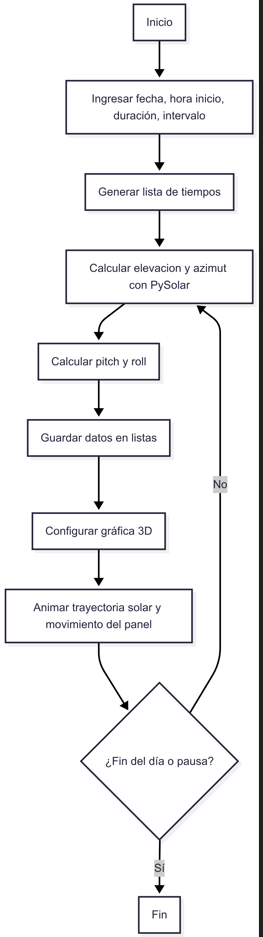

# Librerías empleadas

Las librerías que se emplearon para el proyecto fueron las siguientes:
* Para la interfaz gráfica:
1. tkinder.
2. ttk.
3. tkcalendar.
* Para los cálculos matemáticos y el manejo de vectores:
1. numpy
* Para la visualización 3D y animación:
1. matplotlib.
2. mpl_toolkits.mplot 3d.
* Para el cálculo preciso de la posición solar empleamos:
1. pysolar.
* Para el manejo correcto de zonas horarias:
1. pytz.
2. datetime.


# Parámetros configurables por el usuario

* Fecha: seleccionada en un calendario.
* Hora de inicio: formato 0–23 horas.
* Duración: cantidad de horas a simular.
* Intervalo: paso de cálculo en minutos (ej. 15 min).

# Interfaz Gráfica

* Panel de configuración con campos de entrada.
* Panel de ángulos calculados (Elevación, Azimut, Pitch, Roll).
* Área de visualización 3D.
* Barra de controles con botones de navegación y un deslizador.

# Animación:
* Se usa matplotlib.animation.FuncAnimation para actualizar la posición del panel y del sol.
* Se dibujan arcos de colores para visualizar elevación y azimut.
* Se permite control manual con botones y deslizador.
# Requerimientos de hardware/software
* Python 3.8 o superior.
* Entorno con soporte para Tkinter y Matplotlib 3D.
* Conexión a internet no necesaria para ejecución (cálculos locales).
## Recomendaciones para usar este proyecto
1. Instalar Python y las librerías indicadas en requirements.txt.
2. Configurar la latitud, longitud y zona horaria según la ubicación deseada.
3. Ejecutar el archivo principal **"seguidor_solar.py"**.
4. Probar con diferentes fechas, horas e intervalos para visualizar cambios en la trayectoria solar.
5. Verificar que el sistema represente correctamente los ángulos en pantalla antes de guardar resultados o capturas.


# Instalación de dependencias

pip install -r requirements.txt

## Prueba del archivo

In [7]:
from seguidor_solar_copy import SolarTrackerApp
import tkinter as tk

root = tk.Tk()
app = SolarTrackerApp(root)
root.mainloop()


In [9]:
%run seguidor_solar_copy.py


c:\Users\USUARIO\anaconda3\Lib\site-packages\pysolar\solartime.py:111: UserWarning: I don't know about leap seconds after 2021
  warnings.warn \
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\USUARIO\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\USUARIO\Documents\CHIRSTIAN_U\Semestre 2025 A\Metodos  Numericos\PROYECTO 2DO BIMESTRE\seguidor_solar_copy.py", line 406, in slider_moved
    self.update_animation(frame)
  File "C:\Users\USUARIO\Documents\CHIRSTIAN_U\Semestre 2025 A\Metodos  Numericos\PROYECTO 2DO BIMESTRE\seguidor_solar_copy.py", line 232, in update_animation
    self.panel.set_verts(self.create_panel_vertices(normal))
    ^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'set_verts'
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\USUARIO\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    r

# Experimentación

Entrando a la fase de experimentación podemos decir que nuestro objetivo primero fue evaluar la precisión, estabilidad y rendimiento del simulador de nuestro seguidor solar, entonces nos pusimos los siguientes objetivos:
1. Exactitud de los ángulos solares "elevación y azimut" y de control "Pitch y Roll".
